## Import Libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing

In [54]:
df = pd.read_csv("laptop_price.csv", encoding="latin-1")

In [55]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [56]:
df = df.drop(["Product", "laptop_ID"], axis=1)

In [57]:
df = df.join(pd.get_dummies(df["Company"], dtype=int))
df = df.drop(["Company"], axis=1)

In [58]:
df = df.join(pd.get_dummies(df["TypeName"], dtype=int))
df = df.drop(["TypeName"], axis=1)

In [59]:
df.ScreenResolution = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])

df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])

df["Screen Width"] = df["Screen Width"].astype("int")
df["Screen Height"] = df["Screen Height"].astype("int")

df = df.drop(["ScreenResolution"], axis=1)

In [60]:
df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])

In [61]:
df["CPU Frequency"] = df["CPU Frequency"].apply(lambda x: x[:-3])
df["CPU Frequency"] = df["CPU Frequency"].astype("float")

In [62]:
cpu_brands = pd.get_dummies(df["CPU Brand"], dtype=int)

cpu_brands.columns = [column + " CPU" for column in cpu_brands.columns] 

df = df.join(cpu_brands)

df = df.drop(["CPU Brand"], axis=1)
df = df.drop(["Cpu"], axis=1)

In [63]:
df.Ram = df.Ram.apply(lambda x: x[:-2])
df.Ram = df.Ram.astype("int")

In [64]:
df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])

df = df.join(pd.get_dummies(df["Memory Type"], dtype=int))
df = df.drop(["Memory Type"], axis=1)

In [65]:
df["Memory MB"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory MB"] = df["Memory MB"].apply(lambda x: float(x[:-2]) * 1000 if x[-2:] == "GB" else float(x[:-2]) * 1000000)
df["Memory MB"] = df["Memory MB"].astype("float")

In [66]:
df = df.drop(["Memory"], axis=1)

In [67]:
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])

gpu_brands = pd.get_dummies(df["GPU Brand"], dtype=int)

gpu_brands.columns = [column + " GPU" for column in gpu_brands.columns] 

df = df.join(gpu_brands)

df = df.drop(["GPU Brand"], axis=1)
df = df.drop(["Gpu"], axis=1)

In [68]:
df = df.join(pd.get_dummies(df["OpSys"], dtype=int))
df = df.drop(["OpSys"], axis=1)

In [69]:
df.Weight = df.Weight.apply(lambda x: x[:-2])
df.Weight = df.Weight.astype("float")

In [70]:
df

,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Nvidia GPU,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13.3,8,1.37,1339.69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13.3,8,1.34,898.94,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15.6,8,1.86,575.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,15.4,16,1.83,2537.45,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13.3,8,1.37,1803.60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,1.80,638.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1299,13.3,16,1.30,1499.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1300,14.0,2,1.50,229.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1301,15.6,6,2.19,764.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<Axes: >

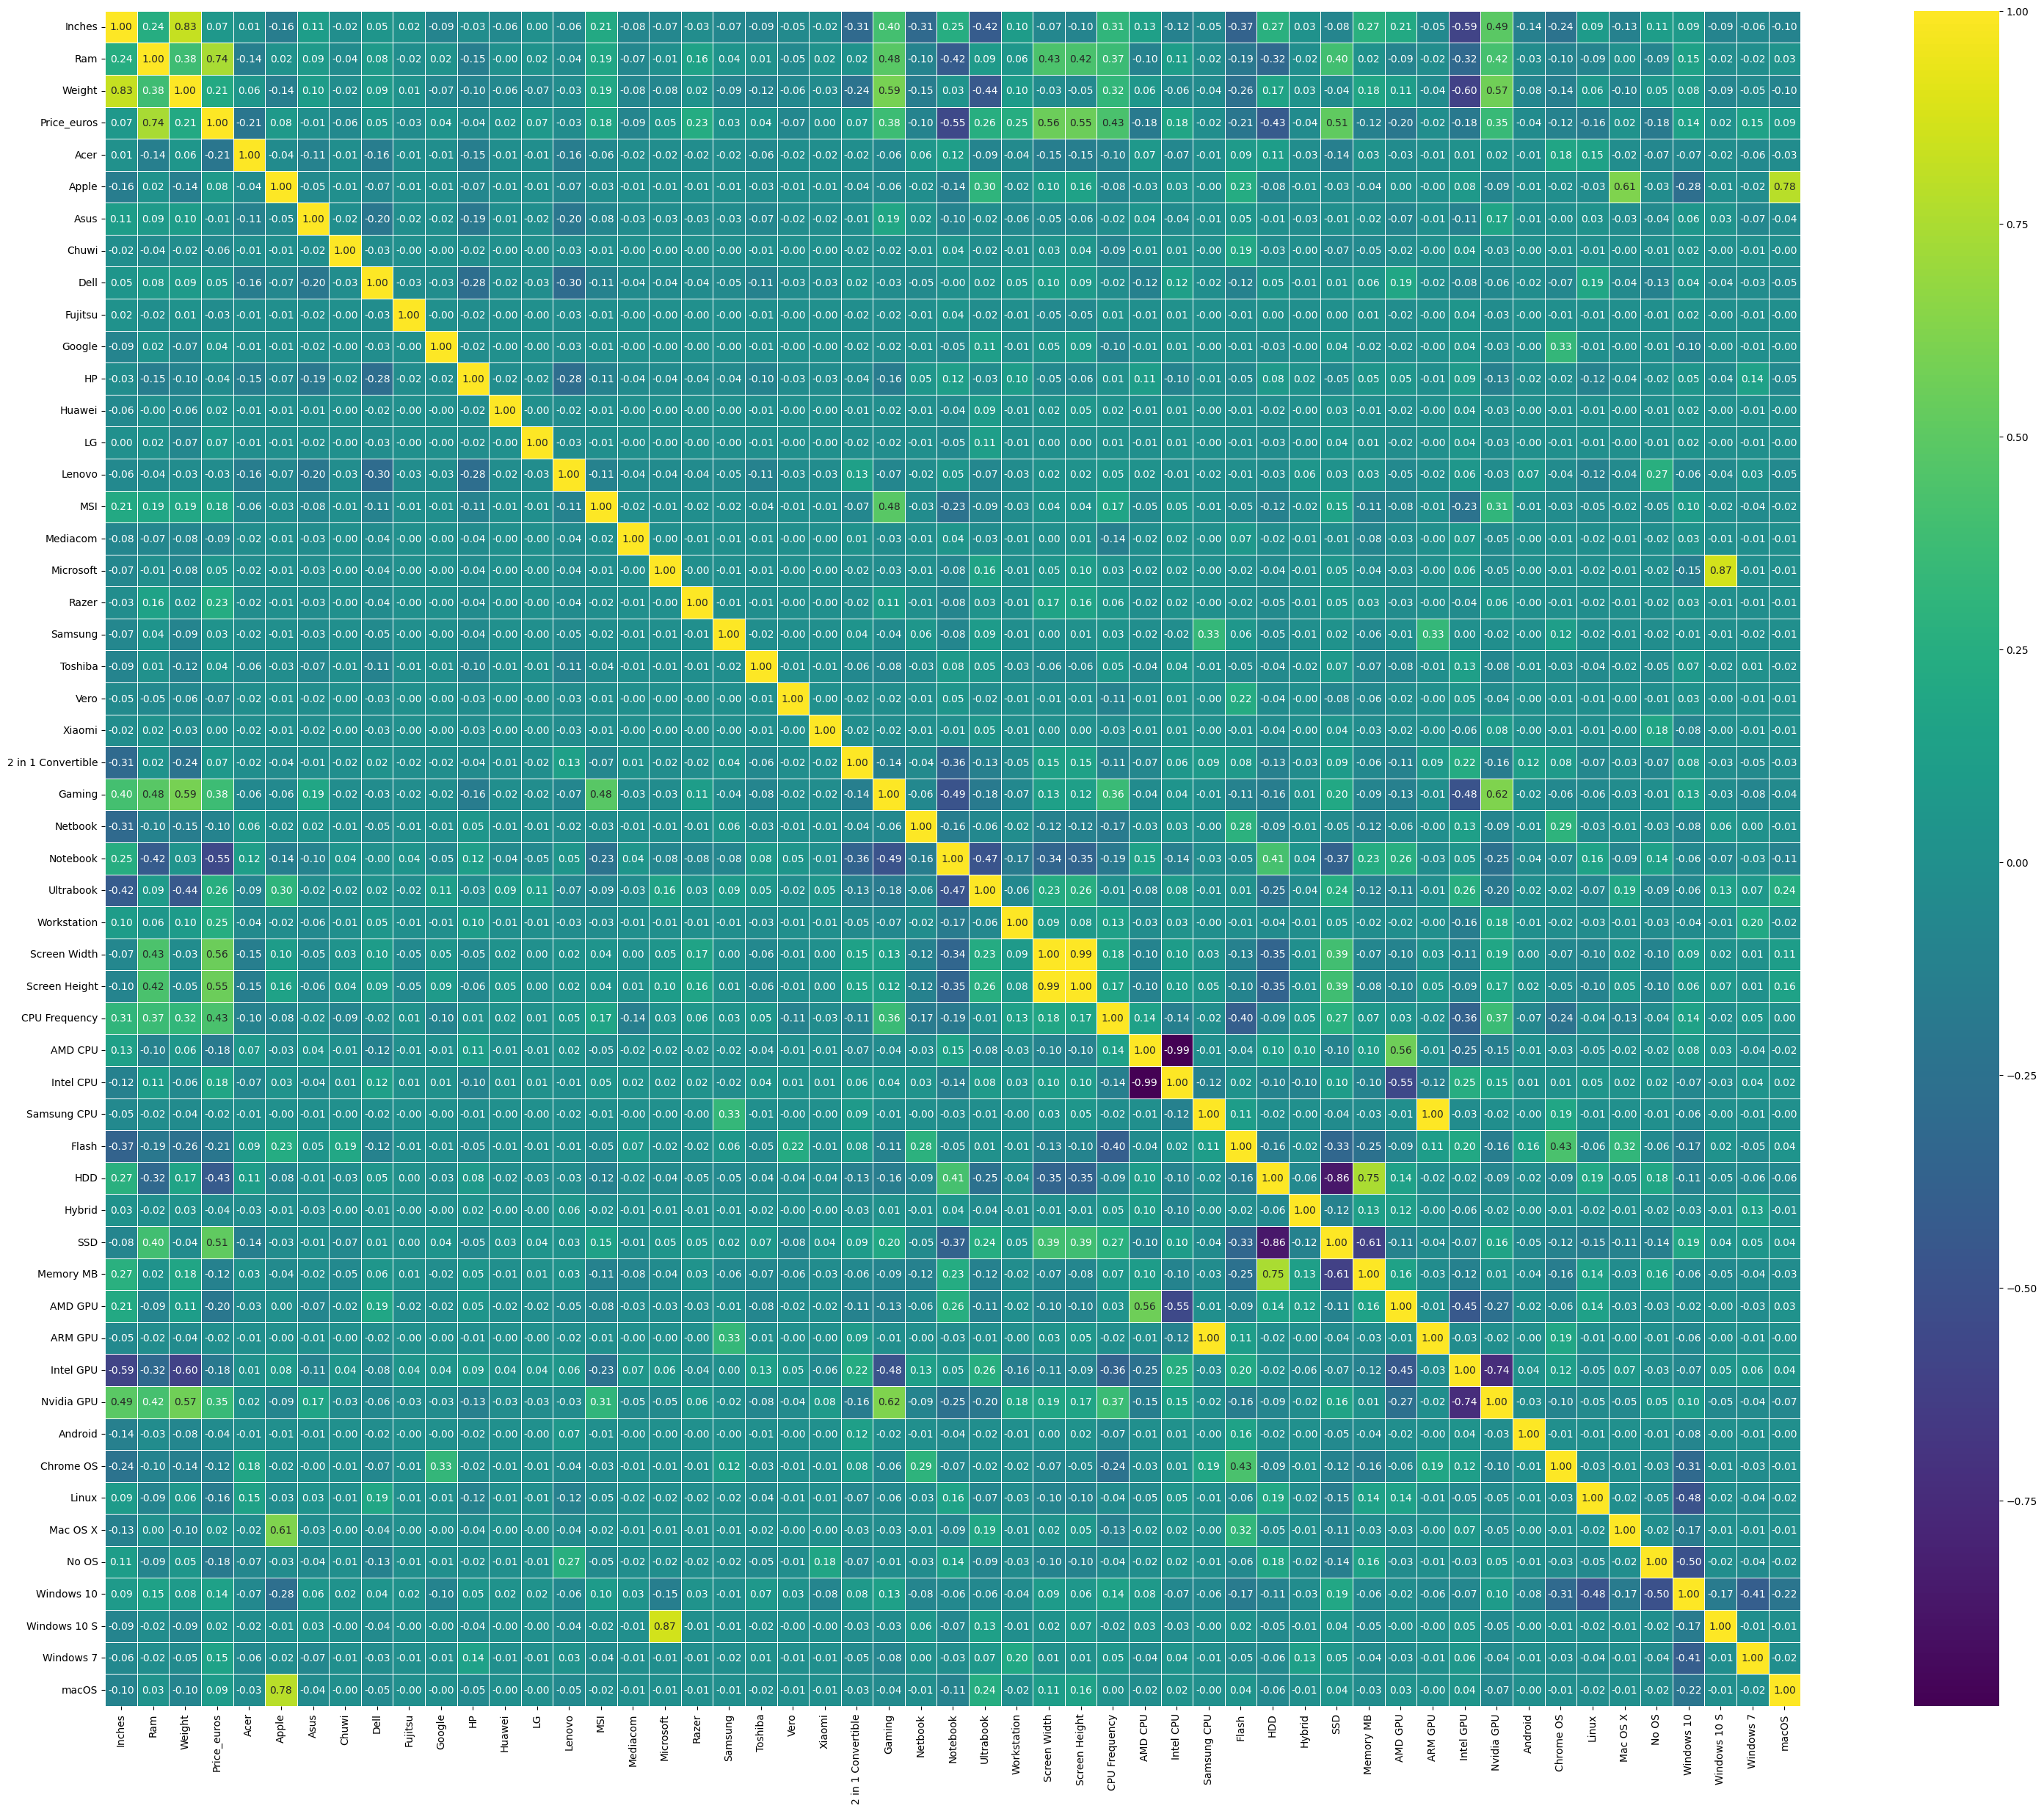

In [71]:
plt.figure(figsize = (40,30))
sns.heatmap(df.corr(), cmap="viridis", annot=True, fmt=".2f", square=True, linewidths=.5)